<a href="https://colab.research.google.com/github/LuanCiribelli/LIstas_Modelagem/blob/main/Quest%C3%A3o_3_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Modelagem - Questão 3  - Luan Reis Ciribelli- Grupo E


In [ ]:
#Importando Bibliotecas
import sympy as sp
import numpy as np
import pylab as pl

Tendo em mente que a relação entre eles é dada por: <br/>
$
\begin{array}{rlc}
C_{n+1} &=&   Cn + (k_0) C_n  - k_1 B_nC_n \\
B_{n+1} &=&   Bn - (k_2) B_n  + k_3 B_nC_n
\end{array}
$

Reescrevendo de forma simbólica, temos:

$
\begin{array}{rlc}
0 &=&  C_{n+1} - Cn - (k_0) C_n   + k_1 B_nC_n \\
0 &=&  B_{n+1} - Bn + (k_2) B_n   - k_3 B_nC_n
\end{array}
$

## (a) Quais suposições estão sendo implicitamente feitas sobre o crescimento de cada espécie na ausencia das outras espécies?

In [ ]:
# Com condições normais
def evolui_sistemaA(x_0, k, n):
  k_0,k_1,k_2,k_3=k
  x=np.zeros((n,2))
  x[0,:]=x_0
  for i in range(0,n-1):
    x[i+1,0] = x[i,0] + (k_0)*x[i,0] - k_1*x[i,0]*x[i,1]
    x[i+1,1] = x[i,1] - (k_2)*x[i,1] + k_3*x[i,0]*x[i,1]

  return (x)  

In [ ]:
  # Para verificar o crescimento da especie na asencia de outra, vamos assumir nas funções correspondentes que B e C são 0; 
  #Usando Ks qualqueres
  cond_iniciais = [[100,150],]
  
  k_0,k_1,k_2,k_3 = (0.6,0,0.1,0)

  k = [k_0, k_1, k_2, k_3]
  for x_0 in cond_iniciais:
    print(x_0)
    x = evolui_sistemaA(x_0, k, n=5)


[100, 150]


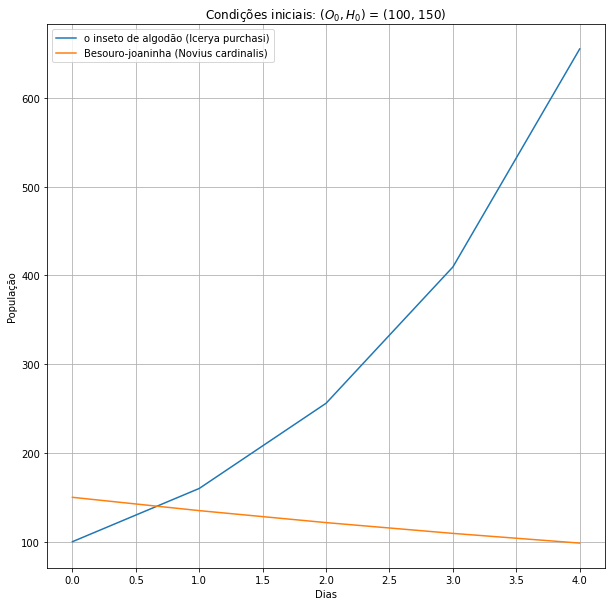

In [ ]:
  pl.figure(figsize=(10,10))
  pl.plot(x[:,0], label=u'o inseto de algodão (Icerya purchasi)')
  pl.plot(x[:,1], label=u'Besouro-joaninha (Novius cardinalis)')
  pl.title(u'Condições iniciais: $(O_0, H_0) $ = ('+str(x_0[0])+ ', '+str(x_0[1])+')')
  pl.legend()
  pl.xlabel('Dias')
  pl.ylabel('População')
  pl.grid(True)
  pl.show()

Resposta: As suposições que estão sendo feitas é que enquanto sem o besouro o inseto de algodão tem um crescimento exponencial, até atingir o limite da população, o besouro decresce com o tempo até que seja extinto. É possivel ver isso no grafico calculado.

---
## (b) Determine os pontos fixos do sistema predador-presa. Considere

In [ ]:
  k_0,k_1,k_2,k_3 = (0.6,0.004,0.1,0.001)

In [ ]:
  #determinam o ponto fixo
  

  C, B = sp.var('C B')
  lado_esquerdo = [C,B]
  lado_direito = [C+ (k_0*C) - k_1*C*B, B- (k_2*B) + (k_3*C*B) , ]
  A = [lado_esquerdo[i] - lado_direito[i] for i in range(len(lado_esquerdo))]
  sp.solve(A, (C,B), dict=True)
  print(sp.solve(A, (C,B), dict=True))
  D = sp.Matrix(A)
  D.jacobian((C,B))

[{C: 0.0, B: 0.0}, {C: 100.000000000000, B: 150.000000000000}]


Matrix([
[0.004*B - 0.6,        0.004*C],
[     -0.001*B, -0.001*C + 0.1]])

Como observado pela função acima, os pontos fixos para esse sistema hunter-prey são 100 e 150.

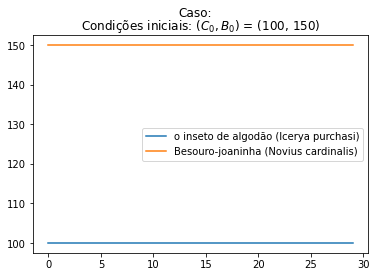

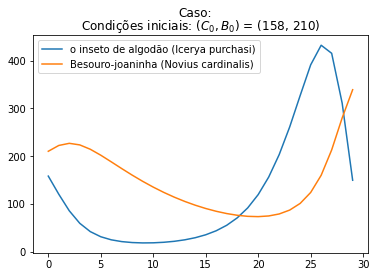

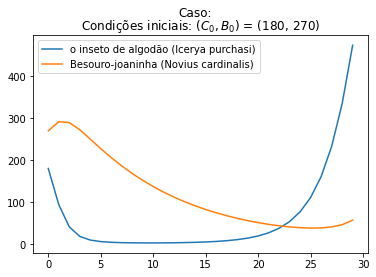

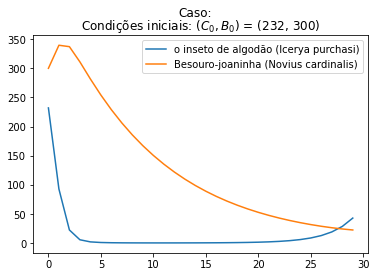

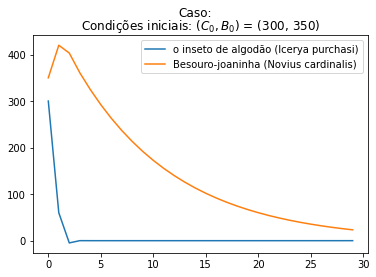

In [ ]:
cond_iniciais = [ [100,150], [158,210],[180,270],[232,300],[300,350] ]

k = [k_0, k_1, k_2, k_3]
for x_0 in cond_iniciais:
  x = evolui_sistemaA(x_0, k, n=30)

  pl.plot(x[:,0], label=u'o inseto de algodão (Icerya purchasi)')
  pl.plot(x[:,1], label=u'Besouro-joaninha (Novius cardinalis)')
  pl.title(u'Condições iniciais: $(C_0, B_0) $ = ('+str(x_0[0])+ ', '+str(x_0[1])+')')
  pl.suptitle('Caso:')
  pl.legend()
  pl.show()

## (c) Modifique o modelo para refletir um sistema predador-presa em que os agricultores aplicam (com regularidade) um inseticida que destroi tanto o predador do inseto quanto a presa do inseto à uma taxa proporcional aos numeros presentes. Escolha adequadamente os novos parâmetros do modelo, se assim for necessario.

Através de testes e levando em conta a proporcionalidade da atuação do inseticida, propusemos a seguinte equação:

$
\begin{array}{rlc}
C_{n+1} &=&   Cn + (k_0) C_n  - k_1 B_nC_n + k_4 Bn \\
B_{n+1} &=&   Bn - (k_2) B_n  + k_3 B_nC_n + k_4 Cn
\end{array}
$

Para um modelo funcional era esperado uma queda inicial do numero de insetos e uma queda incialmente superficial do numero de besouros, seguida de uma queda grande no numero de besouros e aumento do numero de insetos. É isso que pudemos observar nos graficos a seguir :

In [ ]:
#Evolui sistema com sistema
def evolui_sistema_com_inseticida(x_0, k, n):
  k_0,k_1,k_2,k_3,k_4=k
  x=np.zeros((n,2))
  x[0,:]=x_0
  for i in range(0,n-1):
    x[i+1,0] = x[i,0] + (k_0)*x[i,0] - k_1*x[i,0]*x[i,1] + k_4*x[i,1]
    x[i+1,1] = x[i,1] - (k_2)*x[i,1] + k_3*x[i,0]*x[i,1] + k_4*x[i,0]

  return (x)  

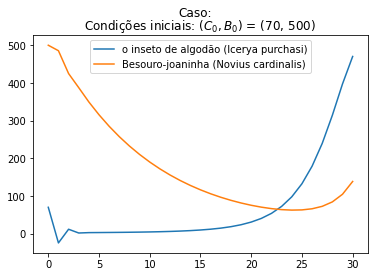

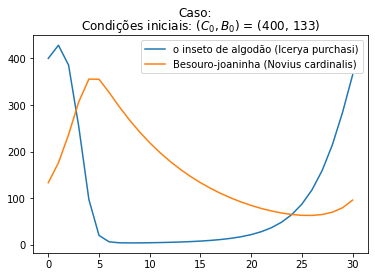

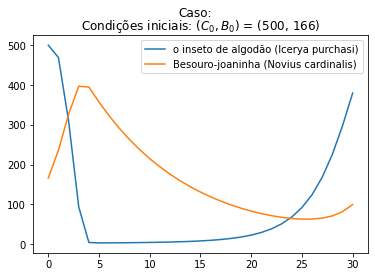

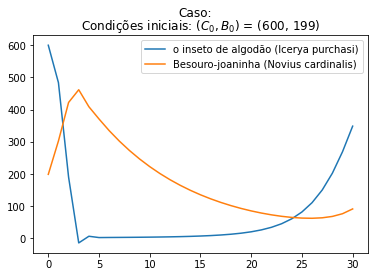

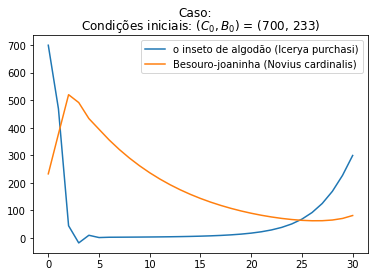

In [ ]:
k_0, k_1, k_2, k_3,k_4= (0.6,0.004,0.1,0.001,0.007)
k = [k_0, k_1, k_2, k_3,k_4]
cond_inicial = [[70,500], [400,133],[500,166],[600,199],[700,233]]
for x_0 in cond_inicial:
  y = evolui_sistema_com_inseticida(x_0, k, n=31)

  pl.plot(y[:,0], label=u'o inseto de algodão (Icerya purchasi)')
  pl.plot(y[:,1], label=u'Besouro-joaninha (Novius cardinalis)')
  pl.title(u'Condições iniciais: $(C_0, B_0) $ = ('+str(x_0[0])+ ', '+str(x_0[1])+')')
  pl.suptitle('Caso:')
  pl.legend()
  pl.show()

##(d) Determine os pontos fixos do sistema predador-presa em que os agricultores aplicam inseticida.

In [ ]:
  #determinam o ponto fixo
  
  k_0,k_1,k_2,k_3,K_4 = (0.6,0.004,0.1,0.001,0.2)
  C, B = sp.var('C B')
  lado_esquerdo = [C,B]
  lado_direito = [C+ (k_0*C) - k_1*C*B + K_4 * B, B- (k_2*B)  + (k_3*C*B) + K_4 * C , ]
  A = [lado_esquerdo[i] - lado_direito[i] for i in range(len(lado_esquerdo))]
  sp.solve(A, (C,B), dict=True)
  print(sp.solve(A, (C,B), dict=True))
  


[{C: 0.0, B: 0.0}, {C: 71.4285714285714, B: 500.000000000000}]


Resposta : OS novos pontos de equilibrio são 71.42 e 500.